In [93]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
sys.path.append("/home/leander/GoogleDriveSync/PhD/Python/")

from Packages.utils import multivariable_taylor_series, T
from Elliptical_Well import EllipticalConfinement
from Cylindrical_Magnet import CylindricalMagnet


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

# Transparent background for figures but keep the legend background white but its text color black
plt.rcParams['legend.facecolor'] = 'black'
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.shadow'] = False
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
# White spins, axis and ticks 
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'

In [94]:
T(2, 2)

[(0, 2), (1, 1), (2, 0)]

In [95]:
R, L = sp.symbols('R L', real=True, positive=True)
Dx, Dy, Dz = sp.symbols('Dx Dy Dz', real=True)
CYM = CylindricalMagnet(R, L, sp.Matrix([Dx, Dy, Dz]))

x,y = sp.symbols('x y', real=True)

integral_order = 20
Bx, By, Bz = CYM.B_integral_expansion(sp.Matrix([x, y, 0]), order=integral_order)

taylor_expansion_order = [7, 7, 7]

print('Computing taylor series')
Bx_taylor_series = multivariable_taylor_series(Bx, [x, y], [0, 0], taylor_expansion_order[0], return_dict=True)
print('Bx done')
By_taylor_series = multivariable_taylor_series(By, [x, y], [0, 0], taylor_expansion_order[1], return_dict=True)
print('By done')
Bz_taylor_series = multivariable_taylor_series(Bz, [x, y], [0, 0], taylor_expansion_order[2], return_dict=True)
print('Bz done')

Computing taylor series
Bx done
By done


KeyboardInterrupt: 

In [ ]:
# Save taylor series to a file
taylor_series = {
    'Bx' : Bx_taylor_series,
    'By' : By_taylor_series,
    'Bz' : Bz_taylor_series,
}


bx_taylor_series = {k: [sp.lambdify((R, L, Dx, Dy, Dz, CYM.B0), coeff, 'numpy') for coeff, term in taylor_series_bx] for k, taylor_series_bx in taylor_series['Bx'].items()}
by_taylor_series = {k: [sp.lambdify((R, L, Dx, Dy, Dz, CYM.B0), coeff, 'numpy') for coeff, term in taylor_series_by] for k, taylor_series_by in taylor_series['By'].items()}
bz_taylor_series = {k: [sp.lambdify((R, L, Dx, Dy, Dz, CYM.B0), coeff, 'numpy') for coeff, term in taylor_series_bz] for k, taylor_series_bz in taylor_series['Bz'].items()}


In [ ]:
taylor_series_functions = {
    'Bx' : bx_taylor_series,
    'By' : by_taylor_series,
    'Bz' : bz_taylor_series,
}

import dill as pickle  # replaces pickle with dill
with open('Paper/taylor_series.pkl', 'wb') as f:
    pickle.dump(taylor_series_functions, f)

In [ ]:
terms_5order = [
    x**5, x**4*y, x**3*y**2, x**2*y**3, x*y**4, y**5,
]

In [ ]:
bx_taylor_series_f_aux = 0
for k, taylor_series_bx in taylor_series['Bx'].items():
    for coeff, term in taylor_series_bx:
        if term in terms_5order:
            continue
        bx_taylor_series_f_aux += coeff * term
bx_taylor_series_f = sp.lambdify((x, y, R, L, CYM.B0, Dx, Dy, Dz), bx_taylor_series_f_aux, 'numpy')

by_taylor_series_f_aux = 0
for k, taylor_series_by in taylor_series['By'].items():
    for coeff, term in taylor_series_by:
        if term in terms_5order:
            continue
        by_taylor_series_f_aux += coeff * term
by_taylor_series_f = sp.lambdify((x, y, R, L, CYM.B0, Dx, Dy, Dz), by_taylor_series_f_aux, 'numpy')

bz_taylor_series_f_aux = 0
for k, taylor_series_bz in taylor_series['Bz'].items():
    for coeff, term in taylor_series_bz:
        if term in terms_5order:
            continue
        bz_taylor_series_f_aux += coeff * term
bz_taylor_series_f = sp.lambdify((x, y, R, L, CYM.B0, Dx, Dy, Dz), bz_taylor_series_f_aux, 'numpy')

KeyboardInterrupt: 

In [ ]:

path = 'SkyrmionSimulations/skyrmion_stray_field_FeGd/B_demag_-100nm/'
#path = 'SkyrmionSimulations/skyrmion_stray_field_FeGd/magnetization in the middle/'
#path = 'SkyrmionSimulations/IrCoPt/B_demag +100nm/'
#path = 'SkyrmionSimulations/IrCoPt/Magnetization top Co layer IrCoPt/'

#file_name = 'data_stray_field_skyrmion_TaPtGdCoTaO_60nmabove.csv'
#file_name = 'data_stray_field_skyrmion_TaPtGdCoTaO_66nm_awayfromthemiddle_below.csv'
#file_name = 'B_demag_GdCo_-100nm_1.0Ms.csv'
#file_name = 'B_demag_IrCoPt_0.08T_DMI2.1_Ku0.7_+100nm.csv'
#file_name = 'magnetization_topColayer_IrCoPt_0.08T_DMI1.5_Ku0.7.csv'

file_name = 'B_demag_FeGd_0.09mT_1.00Ms_-100nm.csv'
#file_name = 'magnetization_middleFeGdlayer_0.09mT_1.00Ms.csv'

data = pd.read_csv(path + file_name)
data.head()

# drop column arc_length if it exists
data = data.drop(columns=['arc_length', 'vtkValidPointMask'], errors='ignore')
data.head()

,B_demag.region2_zrange0_:0,B_demag.region2_zrange0_:1,B_demag.region2_zrange0_:2,Points:0,Points:1,Points:2
0,-0.000007,-0.000007,0.015914,0.000000e+00,0.0,0
1,-0.000020,-0.000006,0.015914,1.000000e-09,0.0,0
2,-0.000033,-0.000006,0.015913,2.000000e-09,0.0,0
3,-0.000046,-0.000006,0.015912,3.000000e-09,0.0,0
4,-0.000059,-0.000006,0.015910,4.000000e-09,0.0,0


In [ ]:
columns = data.columns

B_skyrmion_x = data[columns[0]].to_numpy()
B_skyrmion_y = data[columns[1]].to_numpy()
B_skyrmion_z = data[columns[2]].to_numpy()

X = data[columns[3]].to_numpy() * 1e9
Y = data[columns[4]].to_numpy() * 1e9
Z = data[columns[5]].to_numpy() * 1e9

cut_points = np.max([np.sum(Y == Y[0]), np.sum(X == X[0])])

X = X.reshape(cut_points, cut_points)
X_pos = X[0, 0] + (X[0,-1] - X[0,0]) / 2
X = X - X_pos
Y = Y.reshape(cut_points, cut_points)
Y_pos = Y[0, 0] + (Y[-1,0] - Y[0,0]) / 2
Y = Y - Y_pos
Z = Z.reshape(cut_points, cut_points)

B_skyrmion_x = B_skyrmion_x.reshape(cut_points, cut_points)
B_skyrmion_y = B_skyrmion_y.reshape(cut_points, cut_points)
B_skyrmion_z = B_skyrmion_z.reshape(cut_points, cut_points)

In [ ]:
Grad_Bx_x, _ = np.gradient(B_skyrmion_x, 1e-9)


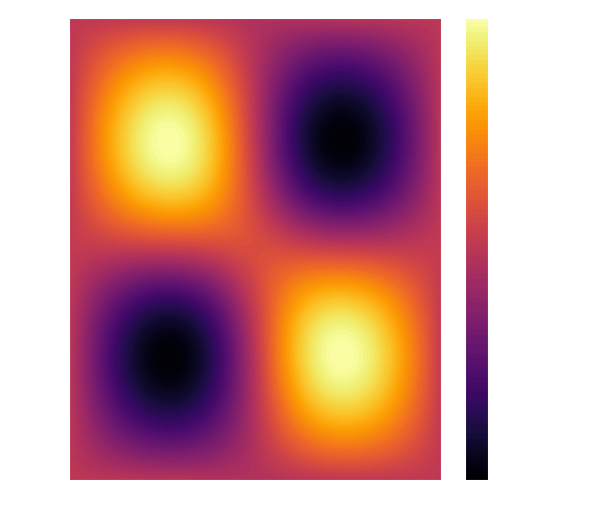

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

c = ax.contourf(X, Y, Grad_Bx_x * 1e3*1e-9, 100, cmap='inferno')
fig.colorbar(c, ax=ax, label='Bx (T)')

In [ ]:
R_axis = X[0]
Y_points = Y[len(Y)//2]

B_skyrmion_x = B_skyrmion_x[len(Y)//2]
B_skyrmion_y = B_skyrmion_y[len(Y)//2]
B_skyrmion_z = B_skyrmion_z[len(Y)//2]

In [ ]:
from multiprocessing import Pool

def compute_similarity(bs, bc):
    return np.dot(bs / np.linalg.norm(bs), bc / np.linalg.norm(bc))

L_val = 60
Dz_val = 130
Dx_val = 30
Dy_val = 0

mu_0 = 4 * np.pi * 1e-7
M = -225e3 * 1.00
B0 = mu_0 * M / (4 * np.pi)

values = {'L': L_val, 'B0': B0, 'position': np.array([Dx_val, Dy_val, Dz_val])}

for R_val in np.array([47]) / 2:
    values.update({'R': R_val})

    B_cylindrical_x = np.zeros_like(B_skyrmion_x)
    B_cylindrical_y = np.zeros_like(B_skyrmion_y)
    B_cylindrical_z = np.zeros_like(B_skyrmion_z)
    B_linearized_x = np.zeros_like(B_skyrmion_x)
    B_linearized_y = np.zeros_like(B_skyrmion_y)
    B_linearized_z = np.zeros_like(B_skyrmion_z)

    def compute_B(i, x, y):
        b_cylindrical_x, b_cylindrical_y, b_cylindrical_z = CYM.B(values, np.array([x, y, 0]))
        b_linearized_x = bx_taylor_series_f(x, y, R_val, L_val, B0, Dx_val, Dy_val, Dz_val)
        b_linearized_y = by_taylor_series_f(x, y, R_val, L_val, B0, Dx_val, Dy_val, Dz_val)
        b_linearized_z = bz_taylor_series_f(x, y, R_val, L_val, B0, Dx_val, Dy_val, Dz_val)
        return (i, b_cylindrical_x, b_cylindrical_y, b_cylindrical_z, b_linearized_x, b_linearized_y, b_linearized_z)


    with Pool(4) as p:
        results = tqdm(p.starmap(compute_B, [(i, r, 0) for i, r in enumerate(R_axis)], chunksize=1), total=len(R_axis), desc='Computing B')
        
    for i, b_cylindrical_x, b_cylindrical_y, b_cylindrical_z, b_linearized_x, b_linearized_y, b_linearized_z in results:
        B_cylindrical_x[i] = b_cylindrical_x
        B_cylindrical_y[i] = b_cylindrical_y
        B_cylindrical_z[i] = b_cylindrical_z
        B_linearized_x[i] = b_linearized_x
        B_linearized_y[i] = b_linearized_y
        B_linearized_z[i] = b_linearized_z

    Bz_0_skyrmion = B_skyrmion_z[len(B_skyrmion_z) // 2]
    Bz_0_cylindrical = B_cylindrical_z[len(B_cylindrical_z) // 2]

    Bz = np.abs(Bz_0_skyrmion - Bz_0_cylindrical)

    print(R_val)
    print(compute_similarity(B_skyrmion_x, B_cylindrical_x))
    print(compute_similarity(B_skyrmion_z, B_cylindrical_z))

Computing B: 100%|██████████| 201/201 [00:00<00:00, 14865.81it/s]

23.5
0.765152490108687
-0.8802003397462875


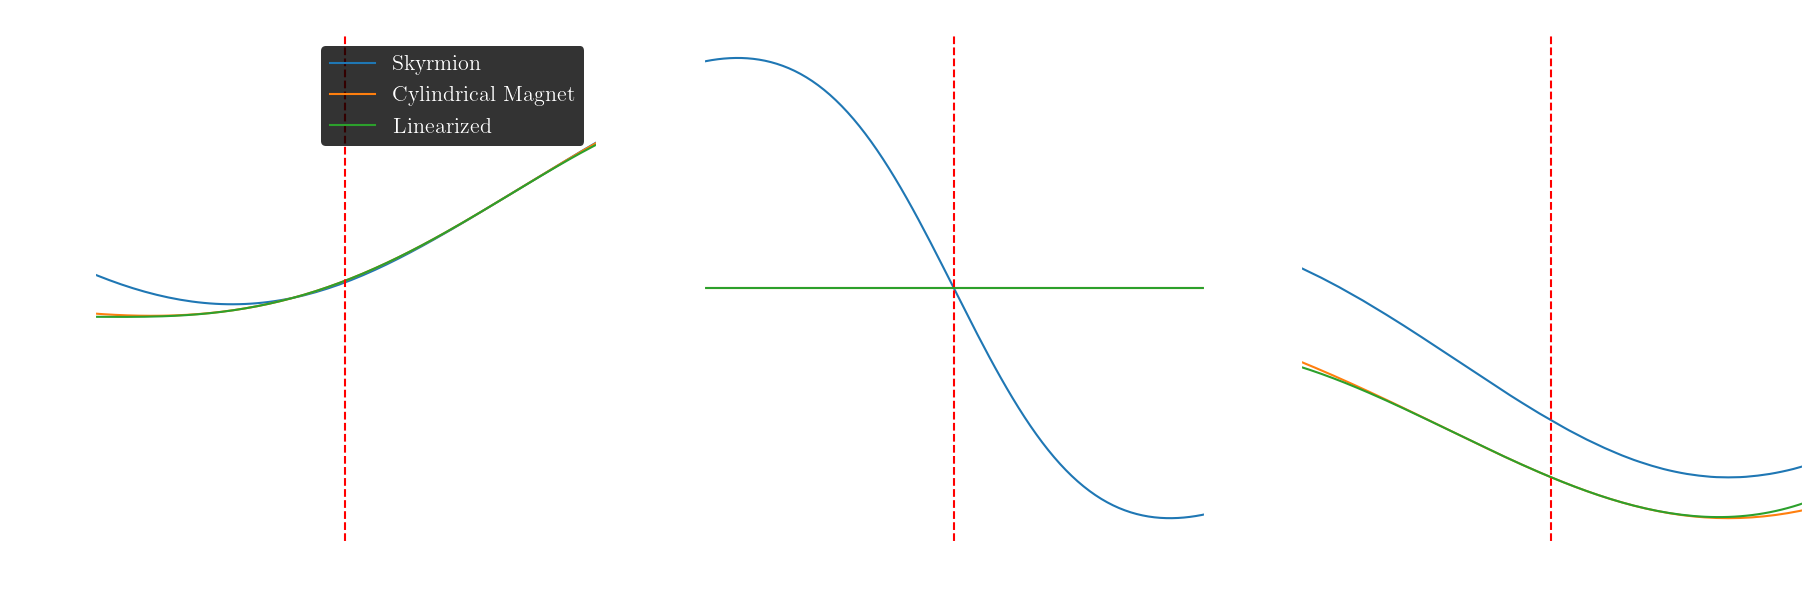

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)


ax[0].set_title('$B_x$')
ax[0].plot(R_axis + Dx_val, B_skyrmion_x * 1e3, label='Skyrmion')
ax[0].plot(R_axis, B_cylindrical_x * 1e3, label='Cylindrical Magnet')
ax[0].plot(R_axis, B_linearized_x * 1e3, label='Linearized')

ax[0].legend()

ax[1].set_title('$B_y$')
ax[1].plot(R_axis, B_skyrmion_y * 1e3)
ax[1].plot(R_axis, B_cylindrical_y * 1e3)
ax[1].plot(R_axis, B_linearized_y * 1e3)

ax[2].set_title('$B_z$')
ax[2].plot(R_axis + Dx_val, B_skyrmion_z * 1e3 - Bz * 1e3, label='Skyrmion - Bz')
ax[2].plot(R_axis, B_cylindrical_z * 1e3)
ax[2].plot(R_axis, B_linearized_z * 1e3)

for i in range(3):
    ax[i].set_xlabel('$x$ (nm)')
    ax[i].set_ylabel('$B$ (T)')
    ax[i].set_xlim([-30 * np.sqrt(2), 30 * np.sqrt(2)])
    # vline
    ax[i].axvline(x=0, color='red', linestyle='--')

In [ ]:
from sympy.physics.quantum import Operator, Commutator

In [ ]:
H_n = Operator('H_n')
#|n><n-1|
n_n_1 = Operator(r'\ket{n}\bra{n-1}')
H_m = Operator('H_m')
m_1_m = Operator(r'\ket{m-1}\bra{m}')

# expand the commutator
Commutator(H_n * n_n_1, H_m * m_1_m).doit()

-(H_m*\ket{m-1}\bra{m}*H_n*\ket{n}\bra{n-1} - H_n*\ket{n}\bra{n-1}*H_m*\ket{m-1}\bra{m})